In [1]:
df <- read.csv('r-ggagi-data/example_cancer.csv')

In [2]:
str(df)

'data.frame':	18310 obs. of  8 variables:
 $ age            : int  75 52 67 62 70 76 55 72 64 71 ...
 $ sex            : Factor w/ 2 levels "남","여": 1 2 2 1 1 2 1 1 1 1 ...
 $ height         : Factor w/ 485 levels "100","130","130.2",..: 252 408 182 262 352 352 467 165 172 232 ...
 $ weight         : Factor w/ 638 levels "100","101","101.1",..: 333 446 349 263 343 563 463 243 363 248 ...
 $ dateOfoperation: Factor w/ 351 levels "2011-01-02","2011-01-03",..: 165 134 146 164 154 160 164 147 219 192 ...
 $ cancerStaging  : Factor w/ 5 levels "I","II","III",..: 1 4 3 1 2 3 2 3 1 2 ...
 $ hospitalization: int  48 17 10 11 10 10 12 18 15 35 ...
 $ diseaseCode    : Factor w/ 13 levels "C18","C180","C181",..: 9 9 9 9 4 11 9 4 13 11 ...


In [3]:
#어느 연령대에서 가장 많은 암이 발생하는 지
#구간(계급) 10, 20, 30...
age_table <- table(cut(df$age, breaks = (0:11)*10))
age_table


   (0,10]   (10,20]   (20,30]   (30,40]   (40,50]   (50,60]   (60,70]   (70,80] 
        0         3        77       482      1917      4558      5679      4598 
  (80,90]  (90,100] (100,110] 
      962        33         1 

In [4]:
rownames(age_table) <- c('1s','10s','20s','30s','40s','50s','60s','70s','80s','90s','100s')
age_table


  1s  10s  20s  30s  40s  50s  60s  70s  80s  90s 100s 
   0    3   77  482 1917 4558 5679 4598  962   33    1 

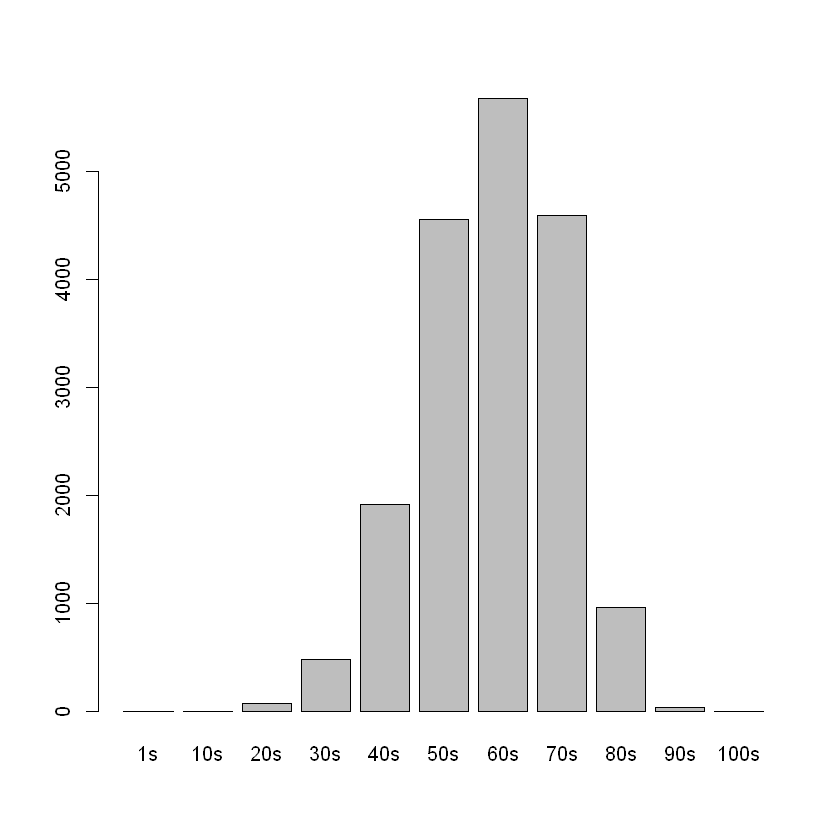

In [5]:
barplot(age_table)

대장암에 걸리는 평균 나이는 60대

In [6]:
#최소값
Min <- min(df$age, na.rm = T)
Min

[1] 18

In [7]:
#사분위값
Quantile <- quantile(df$age, na.rm = T)
Quantile

0%  25%  50%  75% 100% 
  18   55   64   72  102

In [8]:
#평균값
Mean <- mean(df$age, na.rm = T)
Mean

[1] 63.50792

In [10]:
#최대값
Max <- max(df$age, na.rm = T)
Max

[1] 102

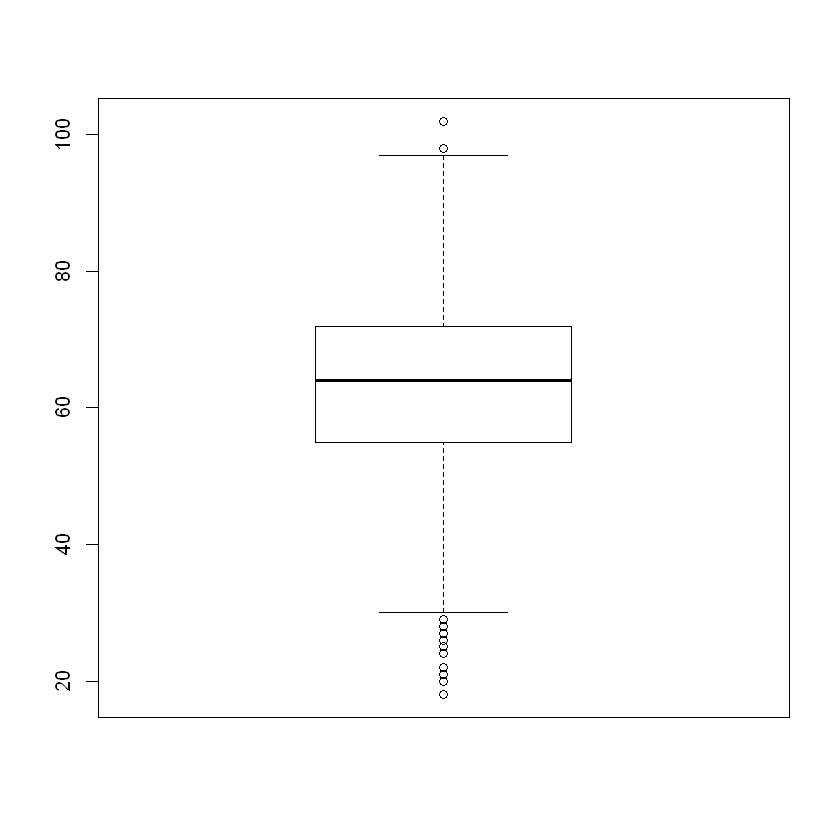

In [11]:
boxplot(df$age)

In [12]:
dist_iqr <- IQR(df$age, na.rm = T)
dist_iqr

[1] 17

In [13]:
post_iqr <- quantile(df$age, probs = c(0.25, 0.75), na.rm = T)
post_iqr

25% 75% 
 55  72

In [14]:
down_whisker <- post_iqr[[1]] - dist_iqr*1.5
up_whisker <- post_iqr[[2]] + dist_iqr*1.5

In [15]:
down_whisker
up_whisker

[1] 29.5

[1] 97.5

In [16]:
outlier <- subset(df, subset = (df$age < down_whisker | df$age > up_whisker))
str(outlier)

'data.frame':	62 obs. of  8 variables:
 $ age            : int  29 28 29 25 24 28 29 28 24 102 ...
 $ sex            : Factor w/ 2 levels "남","여": 1 1 1 2 1 2 1 1 1 2 ...
 $ height         : Factor w/ 485 levels "100","130","130.2",..: 262 156 300 411 252 182 362 277 392 150 ...
 $ weight         : Factor w/ 638 levels "100","101","101.1",..: 399 142 266 429 334 303 243 326 483 318 ...
 $ dateOfoperation: Factor w/ 351 levels "2011-01-02","2011-01-03",..: 132 204 237 299 207 142 287 296 77 167 ...
 $ cancerStaging  : Factor w/ 5 levels "I","II","III",..: 2 1 2 2 4 4 3 4 2 4 ...
 $ hospitalization: int  24 8 9 10 19 7 11 57 19 16 ...
 $ diseaseCode    : Factor w/ 13 levels "C18","C180","C181",..: 6 9 9 6 9 10 12 12 13 13 ...


In [17]:
head(outlier)

,age,sex,height,weight,dateOfoperation,cancerStaging,hospitalization,diseaseCode
426,29,남,162,70.6,2011-05-17,II,24,C184
531,28,남,151.4,44.9,2011-08-02,I,8,C187
902,29,남,165.8,57.3,2011-09-06,II,9,C187
1042,25,여,176.9,73.6,2011-11-10,II,10,C184
1299,24,남,161,64.1,2011-08-05,IV,19,C187
1783,28,여,154,61,2011-05-27,IV,7,C188
